# Simulation of Prices of Coupon-Bearing Bonds using CIR 

In [5]:
import numpy as np
import pandas as pd 
import edhec_risk_kit as erk 
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
erk.bond_price(5, 100, .05, 12, .03)

0    109.275393
dtype: float64

In [7]:
rates, zc_prices = erk.cir(10, 500, b = 0.03, r_0 =0.03)

In [8]:
erk.bond_price(5, 100, .05, 12, rates.iloc[0][[1,2,3]])

1    109.275393
2    109.275393
3    109.275393
dtype: float64

In [9]:
erk.bond_price(5, 100, .05, 12, rates.iloc[1][[1,2,3]])

1    108.595364
2    108.407218
3    107.947865
dtype: float64

<AxesSubplot:>

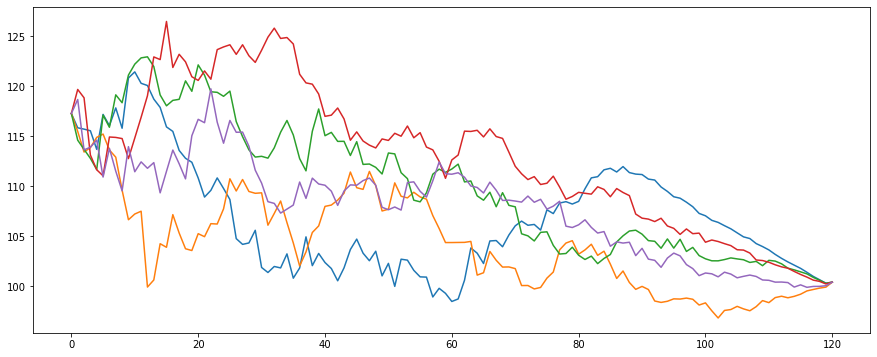

In [10]:
erk.bond_price(10, 100, .05, 12, rates[[1,2,3,4,5]]).plot(legend=False, 
                                                        figsize=(15,6))

In [11]:
prices = erk.bond_price(10, 100, .05, 12, rates[[1,2,3,4,5]])
prices

,1,2,3,4,5
0,117.26,117.26,117.26,117.26,117.26
1,115.83,115.47,114.593,119.661,118.659
2,115.698,113.412,113.68,118.828,113.626
3,115.536,113.852,112.777,113.111,113.894
4,113.677,114.877,111.662,111.64,114.602
...,...,...,...,...,...
116,101.404,99.5415,101.244,100.922,99.9007
117,100.992,99.6851,100.894,100.62,99.9899
118,100.655,99.8224,100.605,100.492,99.9983
119,100.312,99.921,100.303,100.236,100.06


In [12]:
br = prices.pct_change().dropna()
erk.annualize_rets(br, 12)

1   -0.015387
2   -0.015387
3   -0.015387
4   -0.015387
5   -0.015387
dtype: float64

In [15]:
p = erk.bond_price(10, 100, .05, 12, rates[[1, 2, 3, 4]])
btr = erk.bond_total_return(p, 100, .05, 12)
erk.annualize_rets(btr, 12)

1    0.031800
2    0.033031
3    0.030541
4    0.029291
dtype: float64

In [16]:
price_10  = erk.bond_price(10, 100, .05, 12, rates)
price_10[[1,2,3]].tail()

,1,2,3
116,101.404,99.5415,101.244
117,100.992,99.6851,100.894
118,100.655,99.8224,100.605
119,100.312,99.921,100.303
120,100.417,100.417,100.417


In [18]:
price_30  = erk.bond_price(30, 100, .05, 12, rates)
price_30[[1,2,3]].tail()

,1,2,3
116,179.285,84.1602,167.07
117,172.661,85.425,163.119
118,171.372,87.5336,164.008
119,166.395,88.8564,164.05
120,169.239,88.5288,156.4


In [19]:
price_30[[1,2,3]].head()

,1,2,3
0,139.532,139.532,139.532
1,136.049,135.121,132.882
2,135.941,130.106,130.777
3,135.754,131.413,128.704
4,131.171,134.266,126.11


In [22]:
rets_30 = erk.bond_total_return(price_30, 100, .05, 12)
rets_10 = erk.bond_total_return(price_10, 100, .05, 12)
rets_bonds = .6*rets_10 + .4*rets_30

In [24]:
mean_rets_bonds = rets_bonds.mean(axis="columns")
erk.summary_stats(pd.DataFrame(mean_rets_bonds))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.035434,0.00373,0.306824,4.490431,-0.00127,-0.000658,1.417857,-0.000175


In [25]:
price_eq = erk.gbm(n_years=10, n_scenarios=500, mu = 0.07, sigma=0.15)

In [26]:
rets_eq = price_eq.pct_change().dropna()
rets_eq.shape

(120, 500)

In [28]:
rets_bonds.shape

(120, 500)

In [29]:
rets = .7*rets_eq+.4*rets_bonds
rets_mean = rets.mean(axis="columns")
erk.summary_stats(pd.DataFrame(rets_mean))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.064698,0.004036,0.090052,3.294112,-0.003367,-0.002827,8.367082,0.0
